In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#This is just whats ready locally on my machine
df =  pd.read_csv('C:/Users/farha/Desktop/uni stage 3/Introduction to AI/COURSEWORK/Github/intro-to-ai-farhan-labi/covid_19_indonesia_time_series_all.csv')

In [4]:
#See what dataframe looks like
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [5]:
#Checking for any null values
print(df.isnull().any())

Date                           False
Location ISO Code              False
Location                       False
New Cases                      False
New Deaths                     False
New Recovered                  False
New Active Cases               False
Total Cases                    False
Total Deaths                   False
Total Recovered                False
Total Active Cases             False
Location Level                 False
City or Regency                 True
Province                        True
Country                        False
Continent                      False
Island                          True
Time Zone                       True
Special Status                  True
Total Regencies                False
Total Cities                    True
Total Districts                False
Total Urban Villages            True
Total Rural Villages            True
Area (km2)                     False
Population                     False
Population Density             False
L

In [6]:
#Create a copy of the dataset to work on
df_regression = df.copy()

In [7]:
#For the NA values that are in int columns, fill them with medians 
med_gf_nc = df_regression['Growth Factor of New Cases'].median()
med_gf_nd = df_regression['Growth Factor of New Deaths'].median()
med_tot_uv = df_regression['Total Urban Villages'].median()
med_tot_rv = df_regression['Total Rural Villages'].median()
med_tot_c = df_regression['Total Cities'].median()

df_regression['Growth Factor of New Cases'] = df_regression['Growth Factor of New Cases'].fillna(med_gf_nc)

df_regression['Growth Factor of New Deaths'] = df_regression['Growth Factor of New Deaths'].fillna(med_gf_nd)

df_regression['Total Urban Villages'] = df_regression['Total Urban Villages'].fillna(med_tot_uv)

df_regression['Total Rural Villages'] = df_regression['Total Rural Villages'].fillna(med_tot_rv)

df_regression['Total Cities'] = df_regression['Total Cities'].fillna(med_tot_c)

In [8]:
#We can drop the columns: City or Regency, Province, Island, Time Zone, Special Status.
#This is because we already have Location and Location ISO code, for the whole of Indonesia
df_regression = df_regression.drop(columns=['City or Regency', 'Province', 'Island', 'Time Zone', 'Special Status'])

In [9]:
#Check what df looks like now
df_regression 

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Country,Continent,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,Indonesia,Asia,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,0.99,1.0
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,Indonesia,Asia,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,Indonesia,Asia,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,0.99,1.0
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,Indonesia,Asia,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,0.99,1.0
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,Indonesia,Asia,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,Indonesia,Asia,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,0.99,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,Indonesia,Asia,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,Indonesia,Asia,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,Indonesia,Asia,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [10]:
#Check for any null values now
print(df_regression.isnull().any())

Date                           False
Location ISO Code              False
Location                       False
New Cases                      False
New Deaths                     False
New Recovered                  False
New Active Cases               False
Total Cases                    False
Total Deaths                   False
Total Recovered                False
Total Active Cases             False
Location Level                 False
Country                        False
Continent                      False
Total Regencies                False
Total Cities                   False
Total Districts                False
Total Urban Villages           False
Total Rural Villages           False
Area (km2)                     False
Population                     False
Population Density             False
Longitude                      False
Latitude                       False
New Cases per Million          False
Total Cases per Million        False
New Deaths per Million         False
T

In [12]:
#Now we have to encode variables since there are Date and String data types
#.astype(str).apply(le.fit_transform)
for column in df_regression.columns:
    df_regression[column] = LabelEncoder().fit(df_regression[column]).transform(df_regression[column])

In [13]:
#Check types of df
df_regression.dtypes
df_regression

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Country,Continent,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,215,9,4,2,0,0,973,38,20,41,154,1,0,0,0,4,0,20,17,0,29,34,10,8,18,159,0,140,18,935,75,99,99
1,237,9,4,2,0,0,973,40,20,41,155,1,0,0,0,4,0,20,17,0,29,34,10,8,18,167,0,140,18,826,43,100,99
2,237,34,7,2,0,0,973,1,0,0,177,0,0,0,17,9,34,32,33,34,34,21,18,24,1,0,0,0,0,0,0,99,99
3,237,24,26,1,0,0,972,1,0,3,174,1,0,0,7,1,17,21,17,27,24,11,3,28,16,23,0,0,0,0,292,99,99
4,259,9,4,2,0,0,973,42,20,41,157,1,0,0,0,4,0,20,17,0,29,34,10,8,18,177,0,140,18,822,5755,100,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,166,25,31,2,0,0,973,9757,1053,8987,268,1,0,0,8,3,18,24,16,6,11,22,30,30,73,16513,0,8604,3176,594,5889,99,99
21755,166,26,32,4,0,0,975,12480,1920,11573,267,1,0,0,9,6,21,19,8,17,23,20,2,23,69,17300,0,8543,3129,456,5970,382,99
21756,166,30,33,4,0,0,975,11639,2364,10711,211,1,0,0,10,3,25,26,25,28,25,13,6,14,46,13854,0,8413,3040,841,5702,382,99
21757,166,32,34,4,0,1,974,12735,2283,11812,270,1,0,0,14,7,29,28,29,25,30,24,1,31,26,13655,0,6482,1856,488,5939,100,99


In [28]:
#Spltting test train, where we are predicting the number of new cases, where y is target and x is everything else
X = df_regression.drop(columns=['New Active Cases'])
y = df_regression['New Active Cases']

#Using standard test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
#Building linear regression model and fitting
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
#Calculate predictions of model
y_pred = lr_model.predict(X_test)

In [31]:
#Compare predicted vs actual we are looking only at 25 cases here
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
print(df_head)

       Actual    Predicted
18528     461   419.735962
10191     979   973.076714
6648     1085  1122.667087
17802    1055  1049.119524
4725      973   980.478549
2763      972   989.282623
11870     773   754.453081
12352    1019  1003.969051
5265      726  1019.358729
16691    1207  1235.677688
14784     965   958.872577
3515     1137  1193.235619
16722    1246  1281.555898
15530     799   780.940304
16740    1836  2254.520278
7423     1130  1151.109672
763       971   987.915061
1620      996   970.062823
19042     818   790.084585
8388      875   869.825532
3020      950   929.008976
13879    1020  1046.368682
13172    1297  1214.448331
20528     976   952.772949
19058     190  -187.201227


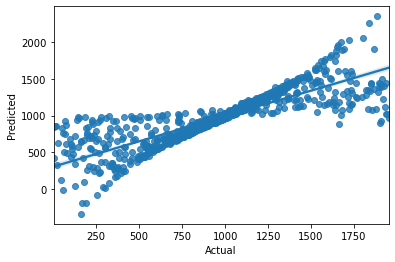

In [32]:
#Plot model of predicted vs actual with seaborn
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.regplot(x='Actual', y='Predicted', data=df_compare);

In [33]:
#Evaluate model performance using RMSE, R2
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 105.89400524855493
R2 score:  0.7088968045341564


In [34]:
#try with cross validation
kf = KFold (5)

fold = 1 
for train_index, test_index in kf.split(X,y):
    lr_model.fit(X[train_index], y[train_index])
    y_test1 = y[test_index]
    y_pred1 = lr_model.predict(X[test_index])
    print("Fold", {fold})
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

KeyError: "None of [Int64Index([ 4352,  4353,  4354,  4355,  4356,  4357,  4358,  4359,  4360,  4361,\n            ...\n            21749, 21750, 21751, 21752, 21753, 21754, 21755, 21756, 21757, 21758], dtype='int64', length=17407)] are in the [columns]"